<a href="https://colab.research.google.com/github/marciro/posdatascience/blob/master/Exercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_churn = pd.read_csv('telco_customer_churn.csv', sep=',')
print(df_churn.shape)
df_churn.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df_churn.InternetService.value_counts
df_churn.InternetService.value_counts() / df_churn.InternetService.value_counts().sum()

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

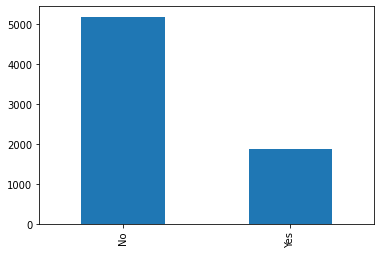

In [8]:

df_churn.Churn.value_counts().plot.bar()

In [9]:
df_cross_churn_gender = pd.crosstab(df_churn.Churn, df_churn.gender)
df_cross_churn_gender





MultipleLines,No,No phone service,Yes
Churn,,,
No,2541,512,2121
Yes,849,170,850


In [10]:


def simplify_multiplelines(x: str) -> str:
  if x  == 'No' or x =='No phone service':
    return 'NO'
  else:
    return 'YES'

df_churn = df_churn.assign(has_internet = df_churn.InternetService.apply(lambda x: (x =='DSL'or x == 'Fiber optic')))
df_churn.head()

df_churn = df_churn.assign(MultiplelinesTransformed = df_churn.MultipleLines.apply(simplify_multiplelines))
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True,NO
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO


In [13]:
df_churn.has_internet.value_counts
df_churn.has_internet.value_counts() / df_churn.has_internet.value_counts().sum()

df_churn.MultiplelinesTransformed.value_counts
df_churn.MultiplelinesTransformed.value_counts() / df_churn.MultiplelinesTransformed.value_counts().sum()

NO     0.578163
YES    0.421837
Name: MultiplelinesTransformed, dtype: float64

In [15]:
df_cross_churn_multiple_lines = pd.crosstab(df_churn.Churn, df_churn.MultiplelinesTransformed)
df_cross_churn_multiple_lines


MultiplelinesTransformed,NO,YES
Churn,,
No,3053,2121
Yes,1019,850


In [16]:
from scipy.stats import chi2_contingency

# realizamos o teste estatístico e assumimos um valor de alpha = 5%
stats, p_value, dof, _ = chi2_contingency(df_cross_churn_multiple_lines)
alpha = 0.05

# a um nível de significância de 5%, aceitamos/rejeitamos a hipótese nula.
if p_value < alpha:
    print('Rejeita o hipótese nula. As variáveis são dependentes')
else:
    print('Aceita o hipótese nula. As variáveis são independentes.')

Rejeita o hipótese nula. As variáveis são dependentes


In [19]:
df_churn.SeniorCitizen.value_counts

df_churn.SeniorCitizen.value_counts() / df_churn.SeniorCitizen.value_counts().sum()

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [45]:
df_churn.PaymentMethod.value_counts
df_churn.PaymentMethod.value_counts() / df_churn.PaymentMethod.value_counts().sum()

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [49]:
def simplify_payment_method(x: str) -> str:
  if x == 'Electronic check' or x == 'Mailed check':
    return 'NO'
  else:
    return 'YES'

df_churn = df_churn.assign(automatic_payment = df_churn.PaymentMethod.apply(simplify_payment_method))
df_churn.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed,tenure_discretized,charges_discretized,payment_method_simplified,automatic_payment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO,0.0,1.0,NO,NO
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True,NO,3.0,2.0,NO,NO
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO,0.0,2.0,NO,NO
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO,4.0,1.0,YES,YES
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO,0.0,3.0,NO,NO


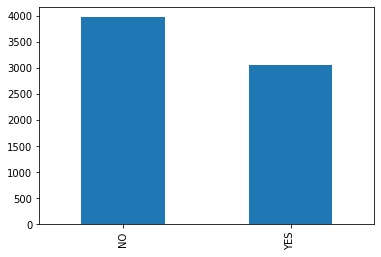

In [48]:
df_churn.payment_method_simplified.value_counts().plot.bar()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed,tenure_discretized
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True,NO,3.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO,4.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO,0.0


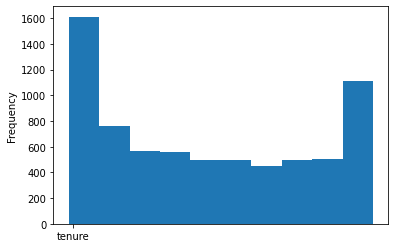

In [33]:
df_churn.tenure.plot.hist()
df_churn.tenure.plot.box()


from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(tenure_discretized = discretizer.fit_transform(df_churn.tenure.values.reshape(-1, 1)))
df_churn.head()




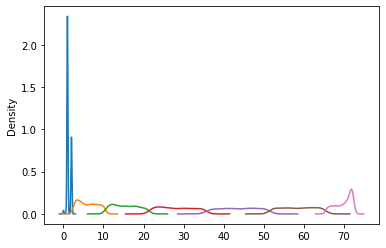

In [34]:
[ df_churn[df_churn.tenure_discretized == i].tenure.plot.density() for i in range(7) ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed,tenure_discretized
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True,NO,3.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO,4.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO,0.0


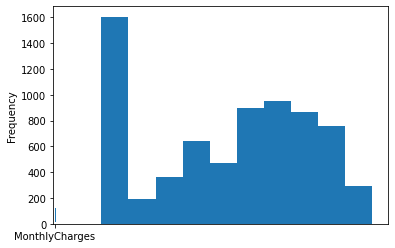

In [36]:
df_churn.MonthlyCharges.plot.hist()


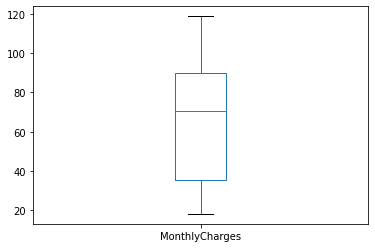

In [37]:
df_churn.MonthlyCharges.plot.box()

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(charges_discretized = discretizer.fit_transform(df_churn.MonthlyCharges.values.reshape(-1, 1)))
df_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed,tenure_discretized,charges_discretized
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO,0.0,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,True,NO,3.0,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO,0.0,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO,4.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO,0.0,3.0


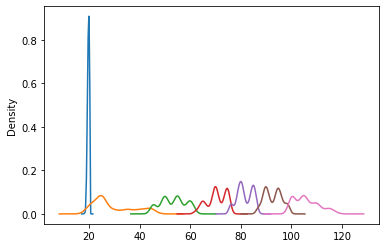

In [43]:
[ df_churn[df_churn.charges_discretized == i].MonthlyCharges.plot.density() for i in range(7) ]

In [55]:
df_churn.TotalCharges.count

<bound method Series.count of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [69]:
df_churn[['TotalCharges']].values

array([['29.85'],
       ['1889.5'],
       ['108.15'],
       ...,
       ['346.45'],
       ['306.6'],
       ['6844.5']], dtype=object)

In [78]:
#df_churn.TotalCharges = df_churn.TotalCharges.astype('float64')

df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'].tolist(), errors='coerce')

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median', add_indicator=True,missing_values=np.nan)
transformed_total_charges = si.fit_transform(df_churn[['TotalCharges']])
transformed_total_charges.shape

#df_churn.TotalCharges = transformed_total_charges[:,0]
#df_churn = df_churn.assign(TotalCharges_indicator = transformed_total_charges[:,1])
df_churn.head()
df_churn.describe()
df_churn.TotalCharges.count

<bound method Series.count of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

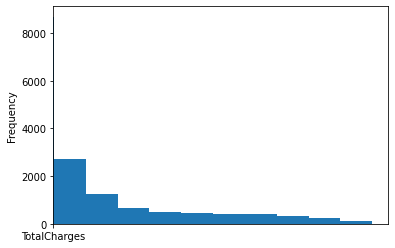

In [80]:
df_churn.TotalCharges.plot.box()
df_churn.TotalCharges.plot.hist()

In [81]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_churn = df_churn.assign(total_charges_discretized = discretizer.fit_transform(df_churn.TotalCharges.values.reshape(-1, 1)))
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,MultiplelinesTransformed,tenure_discretized,charges_discretized,payment_method_simplified,automatic_payment,TotalCharges_indicator,total_charges_discretized
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,NO,0.0,1.0,NO,NO,0.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True,NO,3.0,2.0,NO,NO,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,NO,0.0,2.0,NO,NO,0.0,0.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,NO,4.0,1.0,YES,YES,0.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,NO,0.0,3.0,NO,NO,0.0,0.0


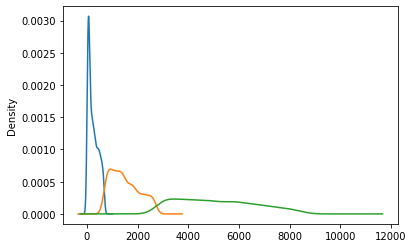

In [82]:
[ df_churn[df_churn.total_charges_discretized == i].TotalCharges.plot.density() for i in range(3) ]

In [88]:
df_churn.Churn.value_counts
df_churn.Churn.value_counts() / df_churn.Churn.value_counts().sum()

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def build_models(alg: str):
    model = None
    if alg == 'logistic_regression':
        model = GridSearchCV(
            LogisticRegression(n_jobs=-1),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'decision_tree':
        model = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestClassifier(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'knn':
        model = GridSearchCV(
            KNeighborsClassifier(n_jobs=-1),
            param_grid={
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
            }, 
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'svm':
        model = GridSearchCV(
            SVC(),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                'class_weight': [None, 'balanced'],
                'kernel': ['linear', 'poly']
            },
            scoring='f1',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
    
    return model

def build_features(df_train, df_test):
    ohe = OneHotEncoder(sparse=False)

    ohe_train = ohe.fit_transform(df_train[['gender','Partner','Dependents','PhoneService','MultipleLines','MultiplelinesTransformed','InternetService','has_internet','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'payment_method_simplified', 'automatic_payment', 'has_internet']])
    ohe_test = ohe.transform(df_test[['gender','Partner','Dependents','PhoneService','MultipleLines','MultiplelinesTransformed','InternetService','has_internet','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'payment_method_simplified', 'automatic_payment', 'has_internet']])

    mm = MinMaxScaler()
    mm_train = mm.fit_transform(df_train[['MonthlyCharges','TotalCharges']])
    mm_test = mm.transform(df_test[['MonthlyCharges','TotalCharges']])

    x_train = np.hstack([ohe_train, mm_train])
    x_test = np.hstack([ohe_test, mm_test])

    y_train = df_train.Churn.values
    y_test = df_test.Churn.values

    return x_train, y_train, x_test, y_test

algs = ['logistic_regression', 'decision_tree', 'random_forest', 'knn', 'svm']
results_matrix = np.zeros(shape=(len(algs), 10, 4, 2)) # shape = (algoritmo, fold, métrica, dataset)
for alg_index, alg in enumerate(algs):
    cv = StratifiedKFold(10, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_churn, df_churn.Churn.values)):
        
        df_train = df_churn.iloc[train]
        df_test = df_churn.iloc[test]
        x_train, y_train, x_test, y_test = build_features(df_train, df_test)

        model = build_models(alg)
        print('Fitting '+alg)
        model.fit(x_train, y_train)

        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # acurácia, treino e teste
        results_matrix[alg_index, fold, 0, 0] = accuracy_score(y_train, y_pred_train)
        results_matrix[alg_index, fold, 0, 1] = accuracy_score(y_test, y_pred_test)

        p_train, r_train, f_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        p_test, r_test, f_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        # precisão, treino e teste
        results_matrix[alg_index, fold, 1, 0] = p_train
        results_matrix[alg_index, fold, 1, 1] = p_test

        # cobertura, treino e teste
        results_matrix[alg_index, fold, 2, 0] = r_train
        results_matrix[alg_index, fold, 2, 1] = r_test

        # fscore, treino e teste
        results_matrix[alg_index, fold, 3, 0] = f_train
        results_matrix[alg_index, fold, 3, 1] = f_test
    
    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Treino - Acurácia', results_matrix[alg_index,:,0,0].mean())
    print('Treino - Precisão', results_matrix[alg_index,:,1,0].mean())
    print('Treino - Cobertura', results_matrix[alg_index,:,2,0].mean())
    print('Treino - Medida F', results_matrix[alg_index,:,3,0].mean())
    print('-' * 50)
    print('Teste - Acurácia', results_matrix[alg_index,:,0,1].mean())
    print('Teste - Precisão', results_matrix[alg_index,:,1,1].mean())
    print('Teste - Cobertura', results_matrix[alg_index,:,2,1].mean())
    print('Teste - Medida F', results_matrix[alg_index,:,3,1].mean())
    print()

Fitting logistic_regression
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored